## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
wine = datasets.load_wine()
#train_x, test_x, train_y, test_y = train_test_split(wine.data, wine.target, test_size=0.2)

In [29]:
import pandas as pd
data_x = pd.DataFrame(wine["data"])
data_x.columns = wine.feature_names
train_x, test_x, train_y, test_y = train_test_split(data_x, wine.target, test_size=0.2)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [21]:
print(wine["DESCR"])
print(wine)
print(wine["feature_name"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

KeyError: 'feature_name'

In [22]:
DT1 = DecisionTreeClassifier(random_state=727)
DT1.fit(train_x, train_y)
pred_y1 = DT1.predict(test_x)
print("accuracy score1:%.3f" %metrics.accuracy_score(test_y, pred_y1))

accuracy score1:0.778


In [23]:
DT2 = DecisionTreeClassifier(criterion="entropy", random_state=727)
DT2.fit(train_x, train_y)
pred_y2 = DT2.predict(test_x)
print("accuracy score1:%.3f" %metrics.accuracy_score(test_y, pred_y2))

accuracy score1:0.778


In [24]:
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=727)
DT2.fit(train_x, train_y)
pred_y2 = DT2.predict(test_x)
print("accuracy score1:%.3f" %metrics.accuracy_score(test_y, pred_y2))

accuracy score1:0.778


In [25]:
DT3 = DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=5, random_state=727)
DT3.fit(train_x, train_y)
pred_y3 = DT3.predict(test_x)
print("accuracy score1:%.3f" %metrics.accuracy_score(test_y, pred_y3))

accuracy score1:0.861


In [33]:
DT4 = DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=5, random_state=727, 
                            min_samples_split=3, min_samples_leaf=2)
DT4.fit(train_x, train_y)
pred_y4 = DT4.predict(test_x)
print("accuracy score1:%.3f" %metrics.accuracy_score(test_y, pred_y4))

accuracy score1:0.917


In [26]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [27]:
print("Feature importance: ", DT1.feature_importances_)
print("Feature importance: ", DT2.feature_importances_)
print("Feature importance: ", DT3.feature_importances_)

Feature importance:  [0.         0.         0.         0.01994482 0.         0.
 0.07366693 0.01709556 0.         0.40621125 0.04471147 0.0209585
 0.41741148]
Feature importance:  [0.04174032 0.         0.         0.         0.         0.
 0.14032723 0.01236602 0.         0.35550612 0.         0.
 0.45006031]
Feature importance:  [0.04748162 0.         0.00875783 0.0420784  0.04240426 0.01080012
 0.         0.02845668 0.01440016 0.35411259 0.         0.36733811
 0.08417023]


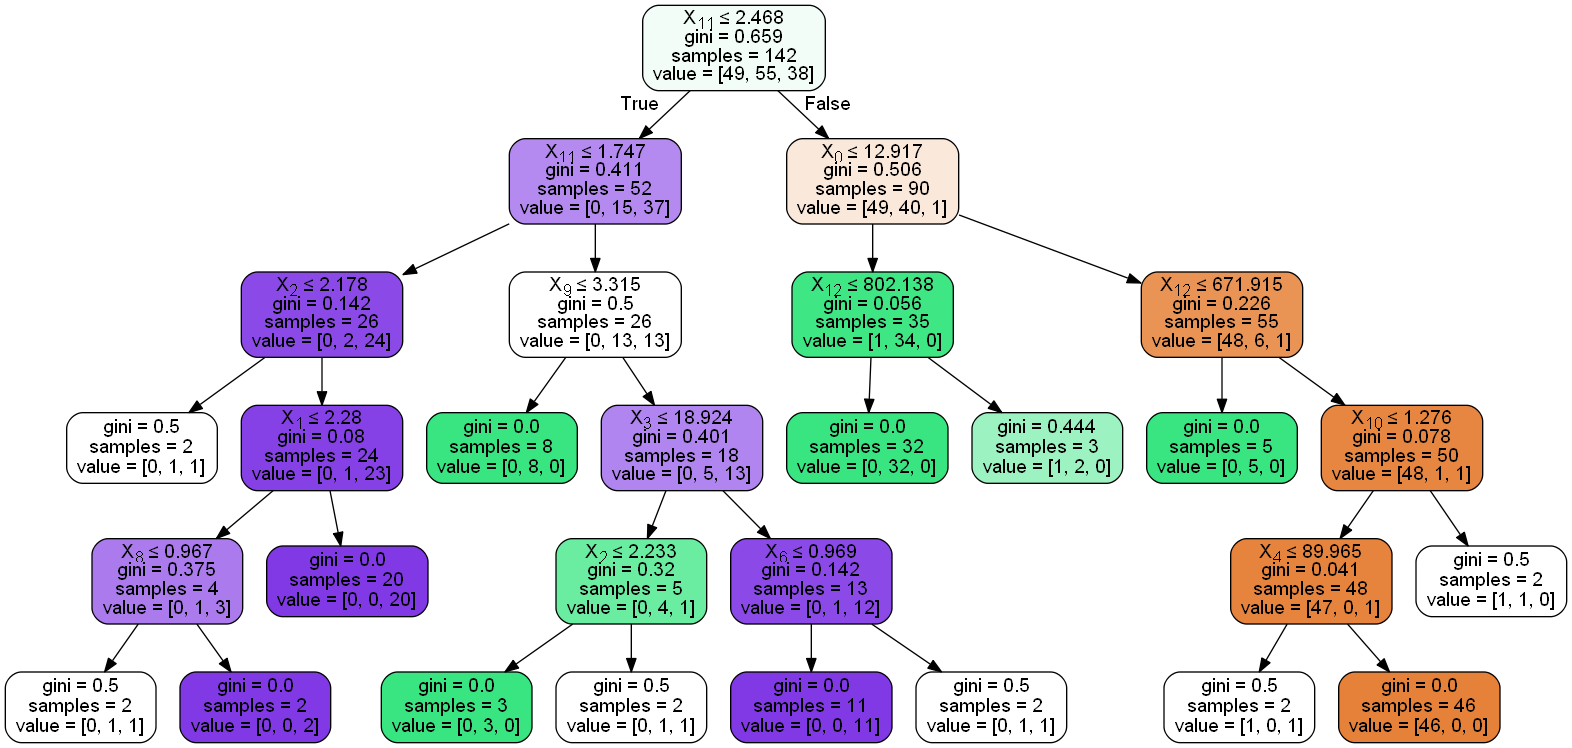

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
import graphviz
dot_data = tree.export_graphviz(DT1, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("wine")
#將結果儲存到iris.pdf

dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine2")
#提供色彩標記功能，jupyter可直接顯示結果，這邊儲存到iris2中

ModuleNotFoundError: No module named 'graphviz'